<a href="https://colab.research.google.com/github/fleckc/visSP23/blob/main/ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import urllib
import os
from google.colab import files
import time, os, sys, re
import pandas_datareader as pdr
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [4]:
%matplotlib inline
plt.style.use('default')

#Introduction

Looking at NJ population, voting habits, and migration. This uses election turnout results from 2000, the 2000 census population counts, and the 2000 census migration patterns in order to retain year similarity. Here are the data sources:

https://www.state.nj.us/state/elections/election-information-ballots-cast.shtml 

(scroll down to 2000 to download the pdf, which I converted to xlsx/csv; it is in a set of cells so it easily converted)

https://www.icpsr.umich.edu/web/ICPSR/studies/13569/

https://www.icpsr.umich.edu/web/ICPSR/studies/13885/

I am interested in seeing the relationships between turnout and population. By population, I mean both the migration and the simple census counts. I do not have a strong idea of what this may look like statistically; it could be as simple as more people move to bigger population areas, but this is why we do statistical analysis.

#Import

In [5]:
njvote=pd.read_csv('https://github.com/fleckc/visSP23/raw/main/NJ2000ballots.csv')
#aok ok good to name dfs with substantive names

In [6]:
njpop=pd.read_csv('https://github.com/fleckc/visSP23/raw/main/njpop2000.csv')

In [7]:
njmigrate=pd.read_fwf('https://github.com/fleckc/visSP23/raw/main/countymigrationinflow.txt')
#inflow migration

In [ ]:
njmigrate2=pd.read_fwf('https://github.com/fleckc/visSP23/raw/main/countymigrationoutflow.txt')
#outflow migration

In [ ]:
njvote=njvote.rename(columns={'COUNTY': 'County'})
njvote #renaming for easier merge later

In [ ]:
countiesd = {'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson', 'Hunterdon', 'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset', 'Sussex', 'Union', 'Warren']}
counties = pd.DataFrame(countiesd)
counties #creating a dataframe (from a dict) for the list of counties to "fix" unmatched county name formats (Atlantic vs Atlantic County)
#aok ok fine, but easier just grab it from online say from wikipedia

#Merges

In [ ]:
njpop=njpop.drop(njpop.index[21:31])
njpop=njpop.drop(['County'], axis=1)
njpop=counties.join(njpop, how="outer")
njpop #dropping extraneous info and renaming counties column for easier merge later
#aok ok good, again very handy and useful to keep it as clean and simple as early as possible

In [11]:
njmigrate=njmigrate.rename(columns={'01001': 'StateCounty2000',
                 '01003': 'StateCounty1995',
                 '87': 'InflowMigration'})
#renaming columns - note will eliminate some data in this instance but none we will use

In [49]:
njmigrate2=njmigrate2.rename(columns={'01001': 'StateCounty2000',
                 '01003': 'StateCounty1995',
                 '147': 'OutflowMigration'})
#renaming columns - note will eliminate some data in this instance but none we will use

In [12]:
njmigratenjonly=njmigrate.query('StateCounty2000 > 34000 & StateCounty2000 < 35000')
#eliminating FIPS codes/counties that are not NJ

In [50]:
njmigrate2njonly=njmigrate2.query('StateCounty2000 > 34000 & StateCounty2000 < 35000')

In [13]:
njmigrateonly2=njmigratenjonly.groupby('StateCounty2000')['InflowMigration'].sum()
njmigrateonly2=pd.DataFrame(data=njmigrateonly2)
njmigrateonly2=njmigrateonly2.reset_index(drop="true")
#not really what I wanted but it'll work in the end

In [55]:
njmigrate2only2=njmigrate2njonly.groupby('StateCounty2000')['OutflowMigration'].sum()
njmigrate2only2=pd.DataFrame(data=njmigrate2only2)
njmigrate2only2=njmigrate2only2.reset_index(drop="true")

In [ ]:
njmerge1 = counties.join(njmigrateonly2, how="outer")
#putting county names to the total migration inflows
njmerge1 = njmerge1.join(njmigrate2only2, how="outer")
#merging inflow and outflow
njmerge1.head()

In [ ]:
njmerge2=pd.merge(njmerge1, njvote, how="outer", indicator="merge")
#merging migration and turnout
#aok again when merging turn on the indicator to have a handy _merge variable; and dont forget to investigate that variable as we did in class;
# AND do say explicitly whether it all merge ok, or what are the problems and how you fixed them etc
njmerge2.head()

In [ ]:
njmerge3= pd.merge(njpop, njmerge2, how="outer", on='County', indicator="merge2")
#merging everything together into one dataset with common county naming convention
njmerge3.head()

In [ ]:
njmerge3.dtypes
#need to fix object to integer or float TODO

The final merge also merged without issue, as indicated by the last two columns. This gives us a dataset with information by county on population, inflow migration, outflow migration, and turnout in the year 2000. However, not every data type is correct.

#Plots

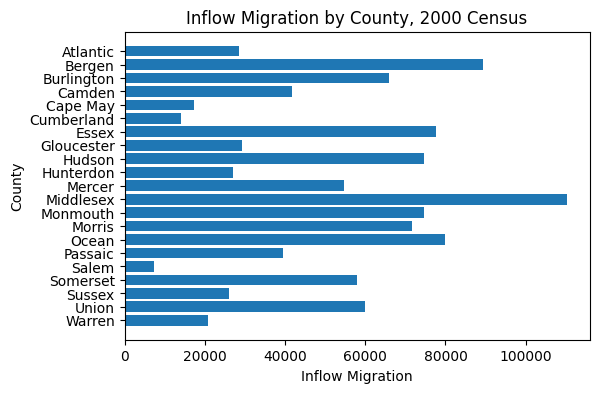

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)

ax.set_title('Inflow Migration by County, 2000 Census')
ax.set_xlabel('Inflow Migration')
ax.set_ylabel('County')
ax.invert_yaxis()
ax.barh(njmerge3.County, njmerge3.InflowMigration)
plt.show();

Basic look at the Inflow Migration counts, sorted alphabetically for basic description.

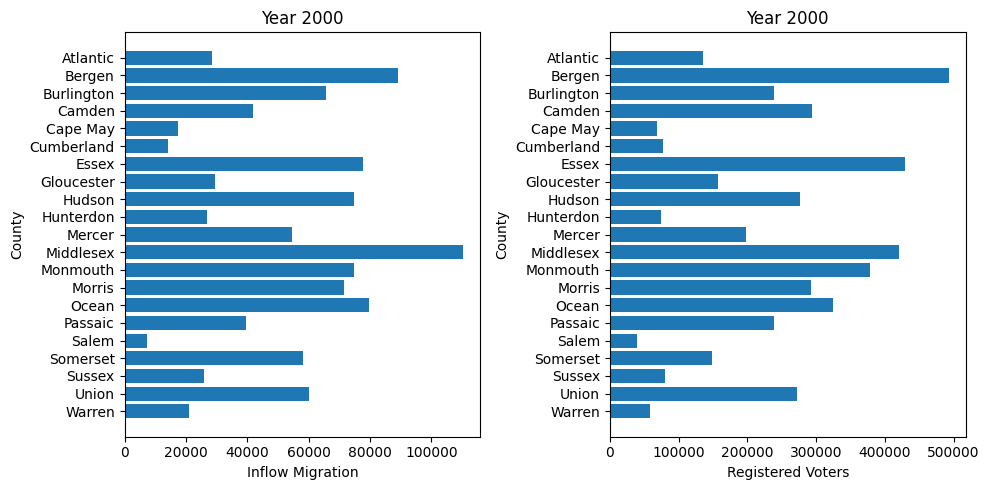

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5), sharey='col', tight_layout='true')

ax[0].barh(njmerge3['County'], njmerge3['InflowMigration'])
ax[1].barh(njmerge3['County'], njmerge3['Total Number of Registered Voters'])
ax[0].set_xlabel('Inflow Migration')
ax[1].set_xlabel('Registered Voters')
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].set_ylabel('County')
ax[1].set_ylabel('County')
ax[0].set_title('Year 2000')
ax[1].set_title('Year 2000')
plt.show();

Attempt to see registered voters compared to migration. Not very useful; scale difference is too large, and graphs look too similar.

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(y="County", x="InflowMigration", data=njmerge3, label="Inflow Migration", color="b")
sns.barplot(y="County", x="Total Number of Registered Voters", data=njmerge3, label="Registered Voters", color="r")
ax.legend(loc='lower right')
ax.set(ylabel="", xlabel="Population Metric")
#not sure why this won't stack them, leaving for possible help

Trying to stack migration on top of population.

[Text(0, 0.5, 'Migration Inflow'), Text(0.5, 0, 'Registered Voters')]

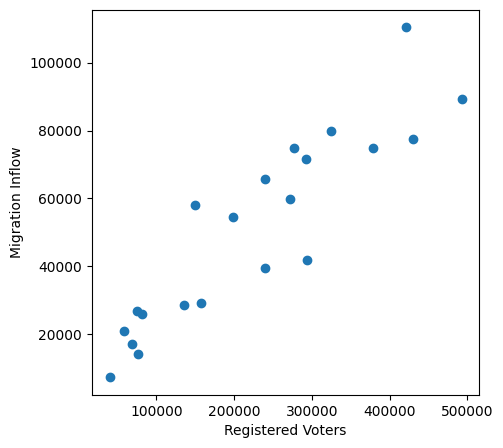

In [45]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(njmerge3['Total Number of Registered Voters'], njmerge3['InflowMigration'])
ax.set(ylabel="Migration Inflow", xlabel="Registered Voters")
#have tried a bunch of ways to put the county labels on these points, not sure

Migration Inflow plotted against Registered Voters. There appears to be a relationship between these two variables.